In [3]:
import numpy as np
import pandas as pd

In [4]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

In [5]:
import keras

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# loading the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DL/7.project1/satisfaction/data/train.csv')
data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,46021,84772,Male,Loyal Customer,44,Business travel,Business,3028,2,2,...,4,4,4,4,3,4,5,6,5.0,satisfied
1,94940,120186,Male,Loyal Customer,42,Business travel,Business,1325,2,1,...,2,2,2,2,5,2,4,0,0.0,satisfied
2,3013,105475,Female,Loyal Customer,42,Business travel,Business,3336,3,2,...,4,4,4,4,5,4,4,0,0.0,satisfied
3,72514,73109,Female,Loyal Customer,60,Business travel,Business,2174,1,5,...,1,1,1,1,3,1,1,0,0.0,neutral or dissatisfied
4,60418,49438,Female,Loyal Customer,43,Business travel,Eco,421,5,1,...,3,3,5,3,4,3,5,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,32877,38758,Female,disloyal Customer,41,Business travel,Business,353,4,4,...,1,2,1,4,1,3,1,0,0.0,neutral or dissatisfied
103900,45365,55650,Female,Loyal Customer,27,Business travel,Business,315,2,2,...,4,5,2,5,4,5,4,116,130.0,satisfied
103901,3736,77841,Male,Loyal Customer,25,Business travel,Business,1579,3,3,...,5,5,5,4,5,5,5,240,280.0,satisfied
103902,16281,109370,Male,Loyal Customer,10,Business travel,Business,1826,2,2,...,2,1,3,3,4,3,2,20,0.0,neutral or dissatisfied


In [8]:
# splitting the dataset
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size = 0.2)

In [9]:
# removing unnecessary columns from train and test datasets
del train['Unnamed: 0']
del test['Unnamed: 0']

del train['id']
del test['id']

In [10]:
print('trining set NA values:\n', train.isna().sum(), '\n\n')
print('test set NA values:\n', test.isna().sum())

trining set NA values:
 Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             244
satisfaction                           0
dtype: int64 


test set NA value

In [11]:
missing_percentage = train['Arrival Delay in Minutes'].isnull().mean() * 100
print(f"percentage of missing valuse in Arrival Delay in Minutes column: {missing_percentage:.2f}%")

percentage of missing valuse in Arrival Delay in Minutes column: 0.29%


In [12]:
# filling missing values in 'Arrival Delay in Minutes' with its median
median_of_arrival_delay = train['Arrival Delay in Minutes'].median()
train.fillna(median_of_arrival_delay, inplace = True)
test.fillna(median_of_arrival_delay, inplace = True)

In [13]:
print('trining set NA values:\n', train.isna().sum(), '\n\n')
print('test set NA values:\n', test.isna().sum())

trining set NA values:
 Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64 


test set NA values:
 Gender                               0
Cus

In [15]:
# encoding categorical features and target variable using label encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

for column in columns:
  train[column] = label_encoder.fit_transform(train[column])

for column in columns:
  test[column] = label_encoder.fit_transform(test[column])

train['satisfaction'] = label_encoder.fit_transform(train['satisfaction'])

In [16]:
train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
63909,0,0,28,0,0,2252,3,4,4,4,...,3,1,2,4,3,3,3,0,0.0,0
38363,1,1,27,0,0,1020,4,4,4,1,...,1,3,4,4,4,4,1,0,0.0,1
88558,0,0,42,1,1,319,2,5,2,1,...,5,5,2,5,5,5,5,0,0.0,0
103655,0,0,51,0,0,3506,2,1,1,1,...,2,2,2,2,2,2,1,0,0.0,0
643,0,0,52,0,1,102,4,4,4,4,...,5,5,4,5,5,5,3,0,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81020,1,0,61,1,1,872,1,2,1,3,...,3,2,2,4,3,3,3,46,42.0,0
7764,0,0,19,1,1,2586,2,5,2,2,...,4,4,5,4,3,2,4,0,0.0,0
17930,0,0,48,0,0,337,2,2,2,2,...,4,4,4,4,1,4,2,0,0.0,1
6899,0,0,40,0,0,2799,3,2,2,2,...,3,3,3,3,2,3,4,0,0.0,0


In [17]:
test

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
101165,0,0,15,1,1,1723,2,5,2,2,...,2,3,2,3,4,5,2,12,13.0,neutral or dissatisfied
73379,1,0,37,0,2,191,5,3,4,3,...,5,2,2,5,4,2,5,0,13.0,satisfied
98708,0,1,62,0,0,462,1,1,1,2,...,1,3,5,5,3,4,1,0,0.0,neutral or dissatisfied
37668,1,0,17,1,1,2125,2,4,2,2,...,1,1,4,2,3,4,1,0,0.0,neutral or dissatisfied
14834,1,1,36,0,1,306,3,2,4,2,...,1,5,2,3,4,4,4,216,314.0,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6476,0,0,35,1,1,762,2,4,2,3,...,2,4,3,4,4,5,2,43,24.0,neutral or dissatisfied
65610,0,0,37,0,0,208,3,4,4,4,...,2,2,3,3,4,2,2,0,0.0,neutral or dissatisfied
29121,0,0,49,0,0,2556,3,2,2,2,...,3,3,3,3,3,3,3,0,0.0,neutral or dissatisfied
19206,0,0,40,0,0,2266,5,5,5,5,...,4,4,4,4,4,4,3,11,13.0,satisfied


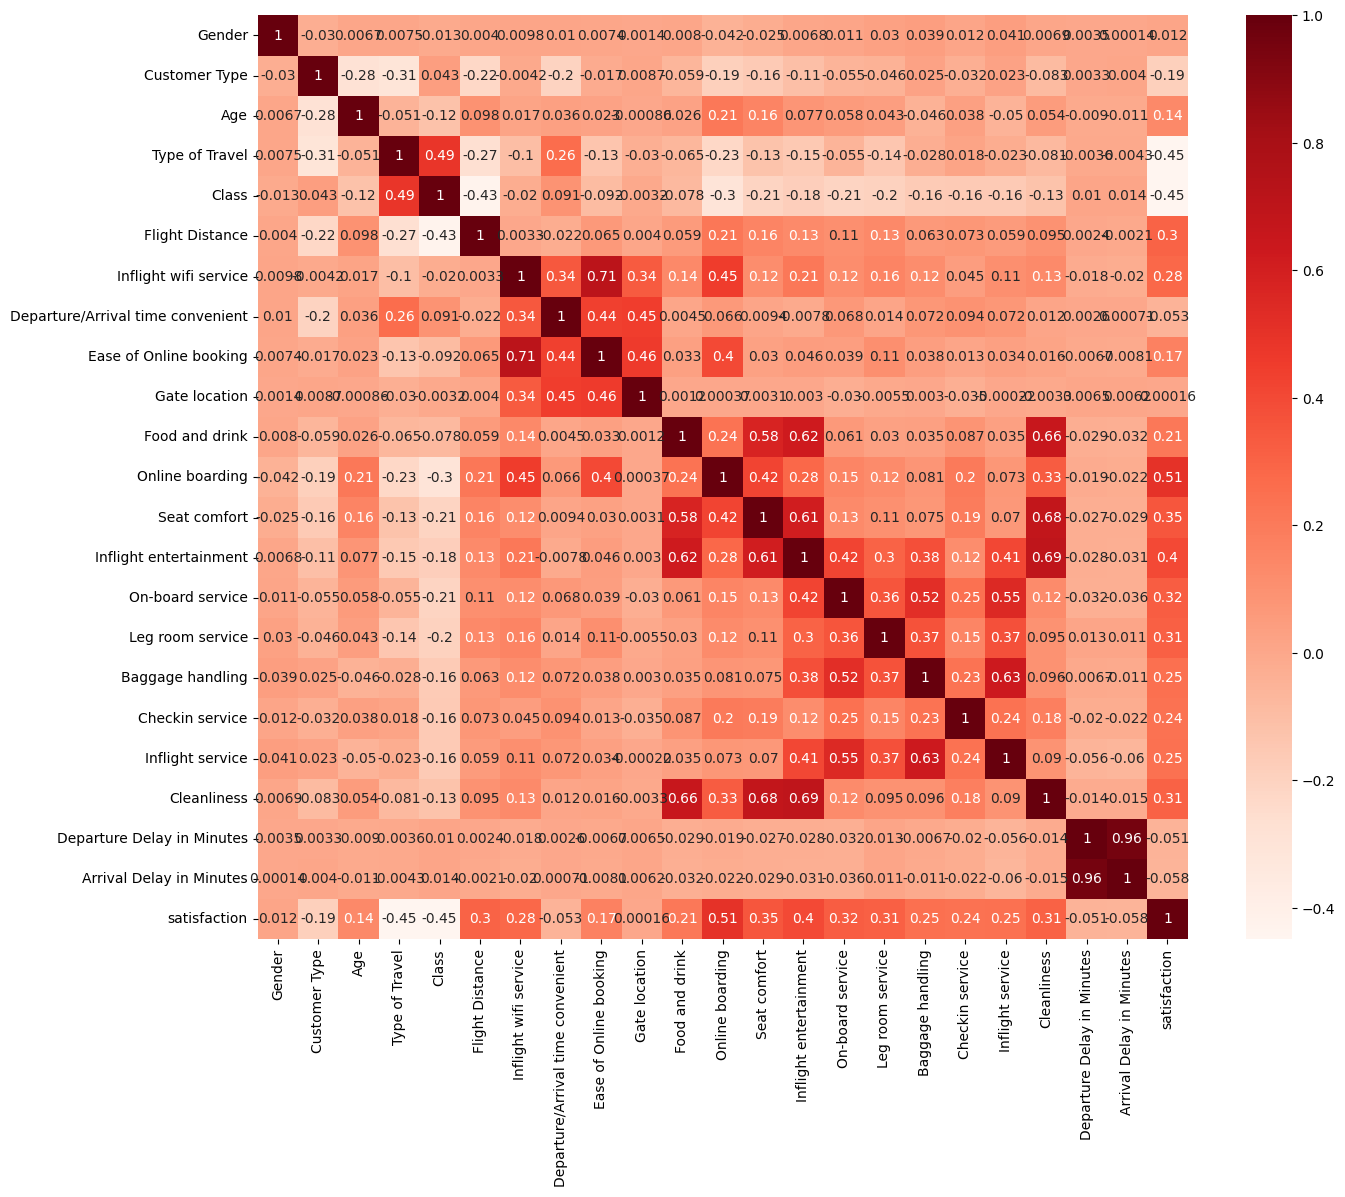

In [19]:
# plotting the correlation matrix heatmap
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 12))
cor = train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

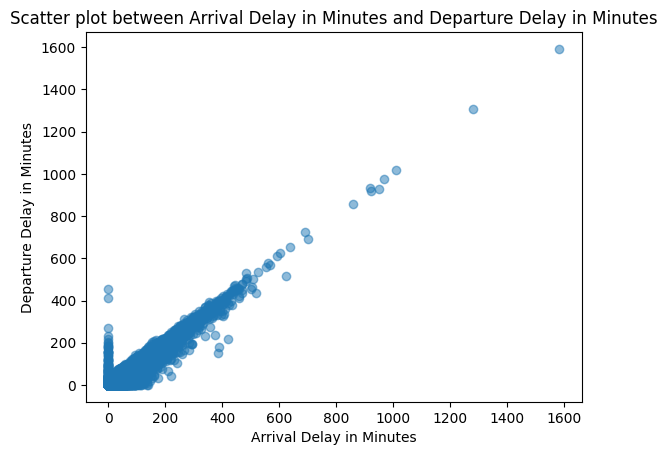

In [20]:
# visualizing the relationship between arrival and departure delaysplt.figure(figsize=(10, 7))
plt.scatter(train['Arrival Delay in Minutes'], train['Departure Delay in Minutes'], alpha=0.5)
plt.title('Scatter plot between Arrival Delay in Minutes and Departure Delay in Minutes')
plt.xlabel('Arrival Delay in Minutes')
plt.ylabel('Departure Delay in Minutes')
plt.show()

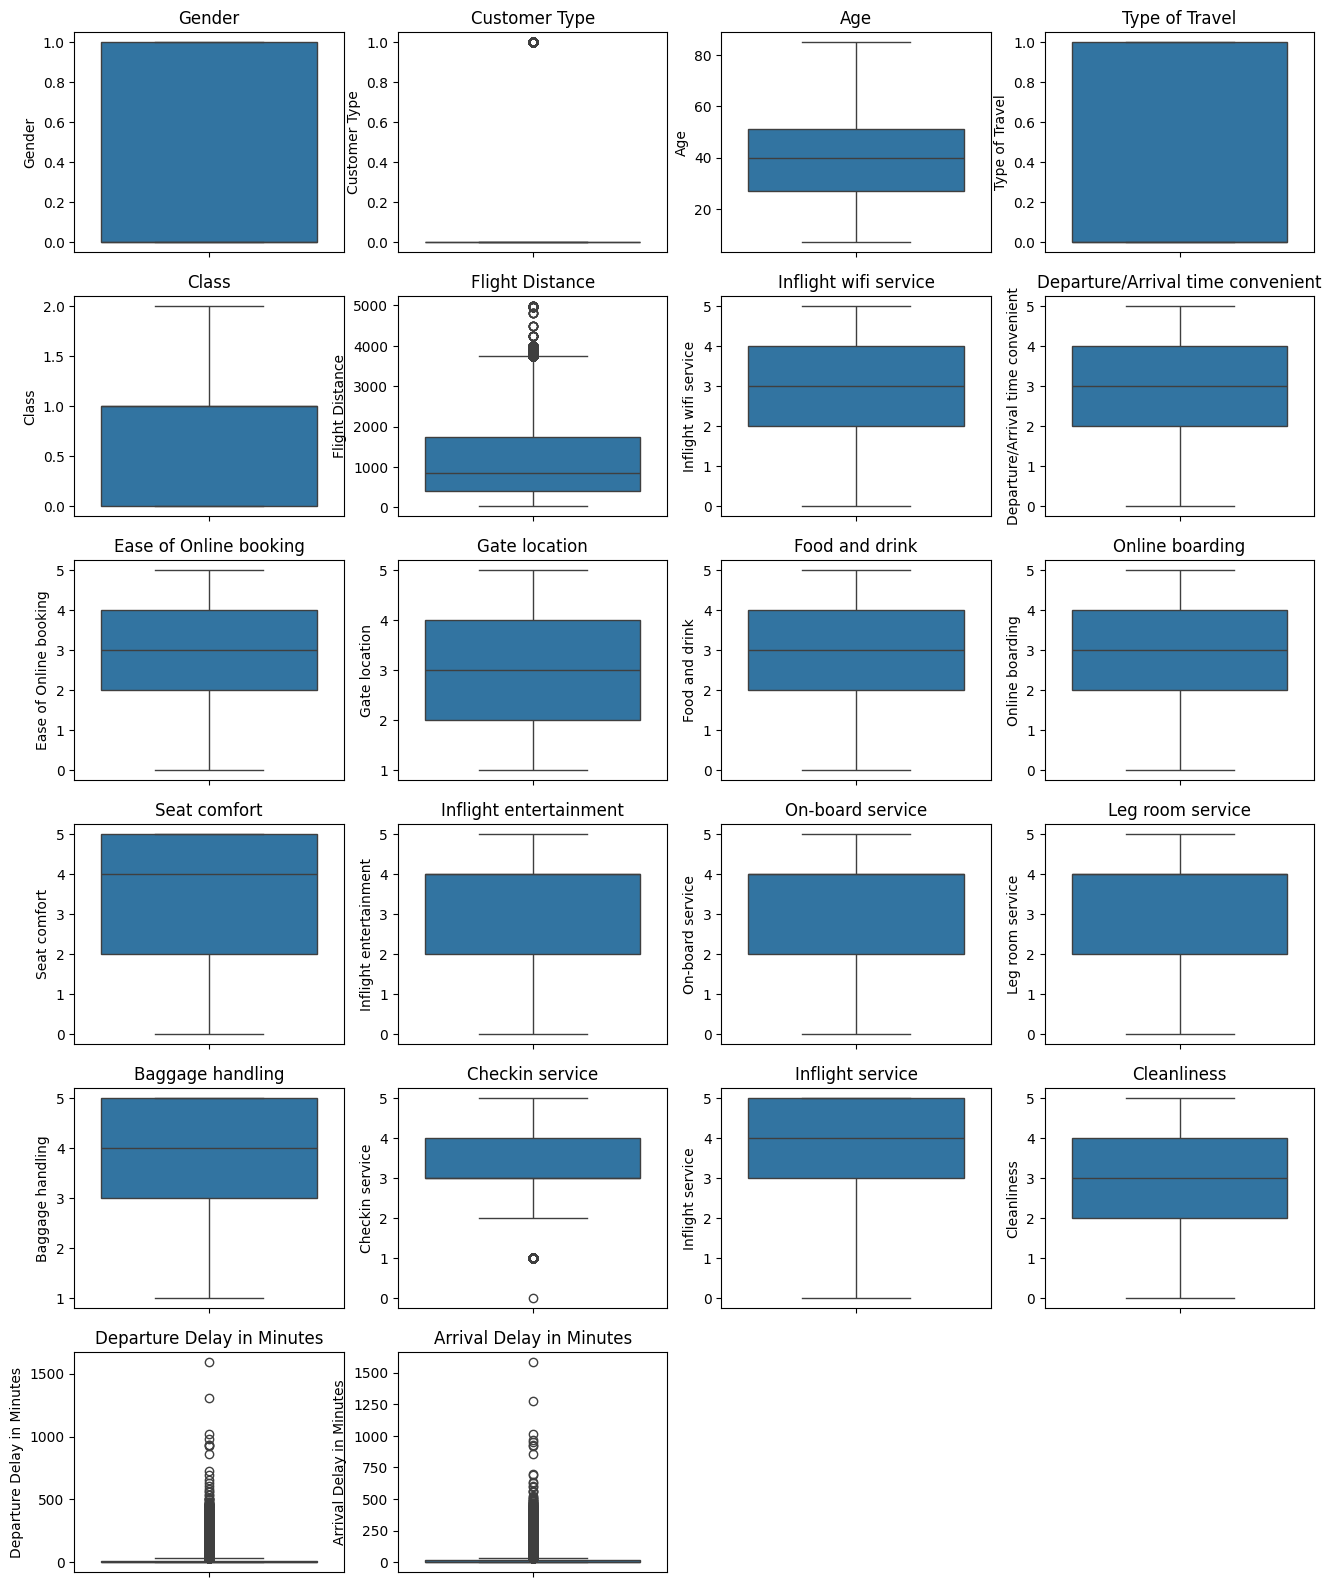

In [21]:
# displaying box plots for each feature in the dataset (except for the 'satisfaction' column)
plt.figure(figsize=(16, 20))
for i, col in enumerate(train.columns):
    if col != 'satisfaction':
        plt.subplot(6, 4, i+1)
        sns.boxplot(train[col])
        plt.title(col)
plt.show()

In [26]:
# standardizing numerical features to improve model performance
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

y_train = train['satisfaction']
X_train = train.drop(columns = ['satisfaction'])

train_data_scaled = std_scaler.fit_transform(X_train)

train_data_scaled_df = pd.DataFrame(train_data_scaled, columns = X_train.columns)
train_data_scaled_df['satisfaction'] = y_train.values
train = train_data_scaled_df.copy()


X_test = test.drop(columns = ['satisfaction'])
y_test = test['satisfaction']

test_data_scaled = std_scaler.transform(X_test)

test_data_scaled_df = pd.DataFrame(test_data_scaled, columns = X_test.columns)
test_data_scaled_df['satisfaction'] = y_test.values
test = test_data_scaled_df.copy()

In [24]:
train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,-0.985228,-0.471990,-0.752795,-0.669806,-0.956596,1.064889,0.204365,0.617348,0.889719,0.802950,...,-0.267021,-1.847767,-1.024702,0.312677,-0.241600,-0.543106,-0.216862,-0.387486,-0.391336,0
1,1.014994,2.118688,-0.818958,-0.669806,-0.956596,-0.171042,0.958421,0.617348,0.889719,-1.546405,...,-1.766825,-0.295894,0.494242,0.312677,0.548584,0.307107,-1.739730,-0.387486,-0.391336,1
2,-0.985228,-0.471990,0.173476,1.492969,0.653185,-0.874279,-0.549692,1.272924,-0.541930,-1.546405,...,1.232783,1.255978,-1.024702,1.159306,1.338769,1.157319,1.306006,-0.387486,-0.391336,0
3,-0.985228,-0.471990,0.768937,-0.669806,-0.956596,2.322891,-0.549692,-1.349379,-1.257754,-1.546405,...,-1.016923,-1.071831,-1.024702,-1.380580,-1.031785,-1.393318,-1.739730,-0.387486,-0.391336,0
4,-0.985228,-0.471990,0.835099,-0.669806,0.653185,-1.091971,0.958421,0.617348,0.889719,0.802950,...,1.232783,1.255978,0.494242,1.159306,1.338769,1.157319,-0.216862,-0.387486,-0.134347,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83118,1.014994,-0.471990,1.430559,1.492969,0.653185,-0.319514,-1.303749,-0.693803,-1.257754,0.019832,...,-0.267021,-1.071831,-1.024702,0.312677,-0.241600,-0.543106,-0.216862,0.808067,0.688017,0
83119,-0.985228,-0.471990,-1.348256,1.492969,0.653185,1.399955,-0.549692,1.272924,-0.541930,-0.763287,...,0.482881,0.480042,1.253714,0.312677,-0.241600,-1.393318,0.544572,-0.387486,-0.391336,0
83120,-0.985228,-0.471990,0.570450,-0.669806,-0.956596,-0.856221,-0.549692,-0.693803,-0.541930,-0.763287,...,0.482881,0.480042,0.494242,0.312677,-1.821970,0.307107,-0.978296,-0.387486,-0.391336,1
83121,-0.985228,-0.471990,0.041152,-0.669806,-0.956596,1.613635,0.204365,-0.693803,-0.541930,-0.763287,...,-0.267021,-0.295894,-0.265230,-0.533952,-1.031785,-0.543106,0.544572,-0.387486,-0.391336,0


In [25]:
test

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,-0.985228,-0.471990,-1.612905,1.492969,0.653185,0.534202,-0.549692,1.272924,-0.541930,-0.763287,...,-1.016923,-0.295894,-1.024702,-0.533952,0.548584,1.157319,-0.978296,-0.075603,-0.057251,neutral or dissatisfied
1,1.014994,-0.471990,-0.157335,-0.669806,2.262967,-1.002687,1.712478,-0.038227,0.889719,0.019832,...,1.232783,-1.071831,-1.024702,1.159306,0.548584,-1.393318,1.306006,-0.387486,-0.057251,satisfied
2,-0.985228,2.118688,1.496721,-0.669806,-0.956596,-0.730822,-1.303749,-1.349379,-1.257754,-0.763287,...,-1.766825,-0.295894,1.253714,1.159306,-0.241600,0.307107,-1.739730,-0.387486,-0.391336,neutral or dissatisfied
3,1.014994,-0.471990,-1.480580,1.492969,0.653185,0.937484,-0.549692,0.617348,-0.541930,-0.763287,...,-1.766825,-1.847767,0.494242,-1.380580,-0.241600,0.307107,-1.739730,-0.387486,-0.391336,neutral or dissatisfied
4,1.014994,2.118688,-0.223497,-0.669806,0.653185,-0.887320,0.204365,-0.693803,0.889719,-0.763287,...,-1.766825,1.255978,-1.024702,-0.533952,0.548584,0.307107,0.544572,5.226413,7.678110,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20776,-0.985228,-0.471990,-0.289660,1.492969,0.653185,-0.429865,-0.549692,0.617348,-0.541930,0.019832,...,-1.016923,0.480042,-0.265230,0.312677,0.548584,1.157319,-0.978296,0.730096,0.225437,neutral or dissatisfied
20777,-0.985228,-0.471990,-0.157335,-0.669806,-0.956596,-0.985633,0.204365,0.617348,0.889719,0.802950,...,-1.016923,-1.071831,-0.265230,-0.533952,0.548584,-1.393318,-0.978296,-0.387486,-0.391336,neutral or dissatisfied
20778,-0.985228,-0.471990,0.636612,-0.669806,-0.956596,1.369860,0.204365,-0.693803,-0.541930,-0.763287,...,-0.267021,-0.295894,-0.265230,-0.533952,-0.241600,-0.543106,-0.216862,-0.387486,-0.391336,neutral or dissatisfied
20779,-0.985228,-0.471990,0.041152,-0.669806,-0.956596,1.078934,1.712478,1.272924,1.605543,1.586068,...,0.482881,0.480042,0.494242,0.312677,0.548584,0.307107,-0.216862,-0.101593,-0.057251,satisfied


In [27]:
# splitting the dataset
X_train, X_val, y_train, y_val = train_test_split(train.drop(columns = ['satisfaction']), train['satisfaction'], test_size = 0.1)

In [33]:
# baseline model 1: k-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)

print("Accuracy of KNN model on validation set: {:.2f}%".format(accuracy_score(y_val, y_pred) * 100))

Accuracy of KNN model on validation set: 92.77%


In [34]:
# baseline model 2: Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)

print("Accuracy of Random Forest model on validation set: {:.2f}%".format(accuracy_score(y_val, y_pred) * 100))

Accuracy of Random Forest model on validation set: 96.34%


In [35]:
# defining a deep neural network for binary classification
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

In [36]:
# compiling the model
model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
              loss = keras.losses.BinaryCrossentropy(),
              metrics = [keras.metrics.Accuracy()])

In [37]:
# training the model
epochs = 100
BATCH_SIZE = 128

early_stopping_cb = keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True, monitor='val_accuracy')

history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val), batch_size=BATCH_SIZE,
                    epochs=100, callbacks=[early_stopping_cb])

Epoch 1/100
585/585 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 2.6292e-06 - loss: 0.3384 - val_accuracy: 0.0000e+00 - val_loss: 0.1766
Epoch 2/100
585/585 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0026 - loss: 0.1787 - val_accuracy: 0.0072 - val_loss: 0.1467
Epoch 3/100
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0183 - loss: 0.1528 - val_accuracy: 0.0201 - val_loss: 0.1302
Epoch 4/100
585/585 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0362 - loss: 0.1387 - val_accuracy: 0.0432 - val_loss: 0.1215
Epoch 5/100
585/585 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0572 - loss: 0.1262 - val_accuracy: 0.0660 - val_loss: 0.1141
Epoch 6/100
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0799 - loss: 0.1186 - val_accuracy: 0.0976 - val_loss: 0.1124
Epoch 7/100
585/585 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1038 - loss: 0.1144 - val_accuracy: 0.1077 - val_loss: 0.1058
Epoch 8/100
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1182 - loss: 0.1072 - 

In [38]:
# predicting on the train and test sets
y_train_pred = (model.predict(X_train, batch_size = 128) > 0.5).astype(int)
y_val_pred = (model.predict(X_test, batch_size = 128) > 0.5).astype(int)
y_test_pred = (model.predict(X_test, batch_size = 128) > 0.5).astype(int)

585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [39]:
# model evaluation
from sklearn.metrics import roc_auc_score

score_train = roc_auc_score(y_train, y_train_pred)
score_test = roc_auc_score(y_test, y_test_pred)

print(f"Model ROC AUC score on training set: {round(score_train, 3)}%")
print(f"Model ROC AUC on test set: {round(score_test, 3)}%")

Model ROC AUC score on training set: 0.979%
Model ROC AUC on test set: 0.957%
